In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [3]:
game_df = pd.read_csv("games.csv")
game_df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [4]:
game_df.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

In [5]:
reviews_df = game_df[(game_df["Positive"])>0]
reviews_df = reviews_df.sort_values(by="Positive", ascending=False)
reviews_df = reviews_df[["Name", "User score", "Positive", "Negative", "Score rank","Genres", "Tags", "Developers","Publishers"]]
reviews_df

,Name,User score,Positive,Negative,Score rank,Genres,Tags,Developers,Publishers
46158,Counter-Strike: Global Offensive,0,5764420,766677,NaN,"Action,Free to Play","FPS,Shooter,Multiplayer,Competitive,Action,Tea...","Valve,Hidden Path Entertainment",Valve
17585,Dota 2,0,1477153,300437,NaN,"Action,Free to Play,Strategy","Free to Play,MOBA,Multiplayer,Strategy,e-sport...",Valve,Valve
57205,Grand Theft Auto V,0,1171197,210154,NaN,"Action,Adventure","Open World,Action,Multiplayer,Automobile Sim,C...",Rockstar North,Rockstar Games
8885,PUBG: BATTLEGROUNDS,0,1154655,895978,NaN,"Action,Adventure,Free to Play,Massively Multip...","Survival,Shooter,Multiplayer,Battle Royale,FPS...","KRAFTON, Inc.","KRAFTON, Inc."
46416,Terraria,0,964983,21044,NaN,"Action,Adventure,Indie,RPG","Open World Survival Craft,Sandbox,Survival,2D,...",Re-Logic,Re-Logic
...,...,...,...,...,...,...,...,...,...
58611,Cut Them Up,0,1,1,NaN,"Action,Adventure,Casual,Indie","Hack and Slash,Gore,Old School,Casual,Minimali...",Yramash Games,Yramash Games
19276,Candy Match 3,0,1,3,NaN,"Casual,Indie","Casual,Indie,Puzzle,Match 3,2D,Relaxing,Score ...",RadLab,RadLab Games
19321,Fishy Dungeon Delving,0,1,0,NaN,"Indie,Early Access","Indie,Early Access",JackoAces Studios,JackoAces Studios
19340,Man of the World,0,1,1,NaN,"Adventure,Indie,RPG","RPG,Life Sim,Choose Your Own Adventure,Pirates...",redduckstudio,redduckstudio


In [22]:
games_reviews_df = reviews_df[["Name","Positive"]]
games_reviews_df = games_reviews_df.sort_values("Positive", ascending=False)
games_reviews_df = games_reviews_df.head(20)
games_reviews_df

,Name,Positive
46158,Counter-Strike: Global Offensive,5764420
17585,Dota 2,1477153
57205,Grand Theft Auto V,1171197
8885,PUBG: BATTLEGROUNDS,1154655
46416,Terraria,964983
8256,Tom Clancy's Rainbow Six® Siege,929372
30583,Team Fortress 2,823693
1289,Garry's Mod,822326
35001,Rust,703687
39530,Left 4 Dead 2,619457


In [7]:
score_reviews_df = reviews_df[["Name", "User score", "Positive"]]
score_reviews_df = score_reviews_df.sort_values("User score", ascending=False)
score_reviews_df = score_reviews_df.head(20)
score_reviews_df

,Name,User score,Positive
2649,K Station,100,10
13285,Hentai Strip Shot,100,26
8563,The Tower of Five Hearts,100,16
59587,Hentai IQ Puzzle,100,27
41482,Funbag Fantasy,100,21
46041,DEEP SPACE WAIFU: NEKOMIMI,98,362
13906,Meltys Quest,97,446
58820,Unlock Me,96,35
51156,Ladykiller in a Bind,95,170
56379,Deep Space Waifu: FLAT JUSTICE,95,1449


In [32]:
genre_reviews_df = reviews_df[["Name","Genres","Positive"]]
genre_reviews_df = genre_reviews_df.sort_values("Positive", ascending=False)
genre_reviews_df = genre_reviews_df.head(20)
genre_reviews_df

,Name,Genres,Positive
46158,Counter-Strike: Global Offensive,"Action,Free to Play",5764420
17585,Dota 2,"Action,Free to Play,Strategy",1477153
57205,Grand Theft Auto V,"Action,Adventure",1171197
8885,PUBG: BATTLEGROUNDS,"Action,Adventure,Free to Play,Massively Multip...",1154655
46416,Terraria,"Action,Adventure,Indie,RPG",964983
8256,Tom Clancy's Rainbow Six® Siege,Action,929372
30583,Team Fortress 2,"Action,Free to Play",823693
1289,Garry's Mod,"Indie,Simulation",822326
35001,Rust,"Action,Adventure,Indie,Massively Multiplayer,RPG",703687
39530,Left 4 Dead 2,Action,619457


In [9]:
genre_reviews_df = reviews_df.groupby("Genres")["Positive"].mean()
genre_reviews_df.head()

Genres
Accounting                                                                                                                                                                       1.5
Accounting,Animation & Modeling,Audio Production,Design & Illustration,Education,Photo Editing,Software Training,Utilities,Video Production,Web Publishing                       8.0
Accounting,Animation & Modeling,Audio Production,Design & Illustration,Education,Photo Editing,Software Training,Utilities,Video Production,Web Publishing,Game Development    262.0
Accounting,Education,Software Training,Utilities,Early Access                                                                                                                   10.0
Accounting,Utilities                                                                                                                                                             4.0
Name: Positive, dtype: float64

In [10]:
new_genre_reviews_df = reviews_df['Genres'].str.split(",").str.join("|").str.get_dummies()
new_genre_reviews_df

,360 Video,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Documentary,Early Access,...,Short,Simulation,Software Training,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing
46158,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17585,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
57205,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8885,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46416,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58611,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19276,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19321,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19340,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
genre_sum_df = new_genre_reviews_df.sum()
genre_sum_df = genre_sum_df.sort_values(ascending=False)
genre_sum_df = genre_sum_df.head(20)
genre_sum_df

Indie                    40709
Action                   24358
Casual                   22481
Adventure                22263
Strategy                 11128
Simulation               11127
RPG                       9909
Early Access              6558
Free to Play              3374
Sports                    2633
Racing                    2138
Massively Multiplayer     1409
Utilities                  611
Violent                    483
Design & Illustration      390
Animation & Modeling       299
Gore                       290
Education                  281
Video Production           204
Audio Production           156
dtype: int64

In [40]:
genre_sum_df.dtypes

dtype('int64')

In [12]:
tags_reviews_df = reviews_df[["Name","Tags","Positive"]]
tags_reviews_df = tags_reviews_df.sort_values("Positive", ascending=False)
tags_reviews_df

,Name,Tags,Positive
46158,Counter-Strike: Global Offensive,"FPS,Shooter,Multiplayer,Competitive,Action,Tea...",5764420
17585,Dota 2,"Free to Play,MOBA,Multiplayer,Strategy,e-sport...",1477153
57205,Grand Theft Auto V,"Open World,Action,Multiplayer,Automobile Sim,C...",1171197
8885,PUBG: BATTLEGROUNDS,"Survival,Shooter,Multiplayer,Battle Royale,FPS...",1154655
46416,Terraria,"Open World Survival Craft,Sandbox,Survival,2D,...",964983
...,...,...,...
52562,黎明生机:启示录-Survival:Revelation,"Indie,Gore,Violent,Multiplayer",1
35872,Cube Smash,"Action,Indie,Sports,VR,Music,Shooter,Funny,Min...",1
35896,Karolina,"Adventure,Side Scroller,Hidden Object,3D,Pixel...",1
52531,Snake VR,"Casual,Simulation,VR",1


In [13]:
tags_reviews_df = reviews_df.groupby("Tags")["Positive"].mean()
tags_reviews_df.head()

Tags
1980s,Action,Retro,Pixel Graphics,Platformer,Side Scroller,2D Platformer,Action-Adventure,Trading Card Game,Trading,2D,Colorful,Funny,Old School,Time Travel,Combat,Controller,Singleplayer                        6.0
1980s,Cyberpunk,Retro,Text-Based,Crime,Trading,Replay Value,Dark Humor,Minimalist,Colorful,Management,Strategy,Dark Comedy,Casual,Capitalism,Dystopian,Stylized,Political,Dark,Conspiracy                          7.0
1980s,Electronic Music,Runner,Difficult,3D Platformer,Arcade,Physics,Atmospheric,Platformer,Precision Platformer,Colorful,Singleplayer,Action,Retro,Stylized,3D,Casual,Controller,Sci-fi,Indie                    14.0
1980s,Old School,PvP,Local Multiplayer,Multiplayer,Retro,Strategy,Space,Arcade,Minimalist,Pixel Graphics,Action,2D,Top-Down,Bullet Hell,Fighting,Top-Down Shooter,Competitive,Free to Play                        22.0
1980s,Platformer,Side Scroller,Pixel Graphics,Retro,Difficult,2D Platformer,Action,Old School,Metroidvania,Indie,2D,Singleplayer,Arcade

In [14]:
new_tags_review_df = reviews_df['Tags'].str.split(",").str.join('|').str.get_dummies()
new_tags_review_df

,1980s,1990's,2.5D,2D,2D Fighter,2D Platformer,360 Video,3D,3D Fighter,3D Platformer,...,Well-Written,Werewolves,Western,Wholesome,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
46158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
57205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46416,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58611,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19276,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19340,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
tags_sum_df = new_tags_review_df.sum()
tags_sum_df = tags_sum_df.sort_values(ascending=False)
tags_sum_df = tags_sum_df.head(20)
tags_sum_df

Indie             36484
Singleplayer      28653
Action            25579
Casual            24418
Adventure         23924
2D                15270
Strategy          12079
Simulation        11895
RPG               10585
Puzzle            10191
Atmospheric        9891
Pixel Graphics     8026
Early Access       7993
3D                 7968
Story Rich         7945
Colorful           7515
Multiplayer        7060
Cute               6930
Arcade             6752
Exploration        6588
dtype: int64

In [16]:
developers_df = reviews_df[["Name", "Developers", "Positive"]]
developers_df = developers_df.sort_values("Positive", ascending = False)
developers_df

,Name,Developers,Positive
46158,Counter-Strike: Global Offensive,"Valve,Hidden Path Entertainment",5764420
17585,Dota 2,Valve,1477153
57205,Grand Theft Auto V,Rockstar North,1171197
8885,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.",1154655
46416,Terraria,Re-Logic,964983
...,...,...,...
52562,黎明生机:启示录-Survival:Revelation,靓之仔个人工作室,1
35872,Cube Smash,Vojtech Ondracek,1
35896,Karolina,Azzunyan,1
52531,Snake VR,"Reality Diversions, LLC.",1


In [17]:
developers_reviews_df = reviews_df.groupby("Developers")["Positive"].mean()
developers_reviews_df.head(20)

Developers
!CyberApex (SkagoGames)                1.000000
#12                                    2.000000
#NVJOB                                 4.000000
#workshop                           2239.333333
'Kill On Sight' Game development      10.000000
'What Day is it?' Games                3.000000
((no-end-parens Studio                 6.000000
(STCG) Smoker The Car Game             3.000000
+7 Software                           76.000000
+Mpact Games, LLC.                   149.000000
+Umbrella                             19.000000
---                                    7.000000
-Yodasaurus- Games                    10.000000
.                                      2.000000
.Cat                                  18.000000
.M.Y.W.                               11.500000
.ToNg                                  1.000000
.ez Games                             16.000000
//commentout                         316.000000
0 Deer Soft                           76.333333
Name: Positive, dtype: float6

In [18]:
developers_reviews_df = developers_reviews_df.sort_values(ascending = False)
developers_reviews_df = developers_reviews_df.head(20)
developers_reviews_df

Developers
Valve,Hidden Path Entertainment                                       5764420.0
Re-Logic                                                               964983.0
KRAFTON, Inc.                                                          578608.0
Innersloth                                                             577656.0
Wallpaper Engine Team                                                  522889.0
OVERKILL - a Starbreeze Studio.                                        520826.0
Psyonix LLC                                                            493188.0
ConcernedApe                                                           475785.0
FromSoftware Inc.                                                      460812.0
Smartly Dressed Games                                                  443320.0
Kinetic Games                                                          441220.0
Bungie                                                                 403109.0
Iron Gate AB                 

In [19]:
publishers_df = reviews_df[["Name", "Publishers", "Positive"]]
publishers_df = publishers_df.sort_values("Positive", ascending = False)
publishers_df

,Name,Publishers,Positive
46158,Counter-Strike: Global Offensive,Valve,5764420
17585,Dota 2,Valve,1477153
57205,Grand Theft Auto V,Rockstar Games,1171197
8885,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.",1154655
46416,Terraria,Re-Logic,964983
...,...,...,...
52562,黎明生机:启示录-Survival:Revelation,靓之仔个人工作室,1
35872,Cube Smash,Artin studios,1
35896,Karolina,Azzunyan,1
52531,Snake VR,"Reality Diversions, LLC.",1


In [20]:
publishers_reviews_df = publishers_df.groupby("Publishers")["Positive"].mean()
publishers_reviews_df.head(20)

Publishers
'Kill On Sight' Game Development      10.000000
((no-end-parens Studio                 6.000000
(STCG) Smoker The Car Game             3.000000
(none)                              4264.500000
++Good Games,GameChanger Charity      28.000000
+7 Software                           76.000000
+Mpact Games, LLC.                   149.000000
+Umbrella                             19.000000
-                                    139.000000
--                                     6.000000
---                                    7.000000
-In.                                  14.000000
-Yodasaurus- Games                    10.000000
.                                      6.500000
...                                   14.500000
.Cat                                  18.000000
.M.Y.W.                               11.500000
.ToNg                                  1.000000
.ez Games                             67.000000
0 Deer Soft Partnership               76.333333
Name: Positive, dtype: float6

In [81]:
publishers_reviews_df = publishers_reviews_df.sort_values(ascending = False)
publishers_reviews_df = publishers_reviews_df.head(20)
publishers_reviews_df

Publishers
Wallpaper Engine Team                                                     522889.000000
Psyonix LLC                                                               493188.000000
Re-Logic                                                                  482802.000000
ConcernedApe                                                              475785.000000
FromSoftware Inc.,Bandai Namco Entertainment                              460812.000000
Smartly Dressed Games                                                     443320.000000
Kinetic Games                                                             441220.000000
Bungie                                                                    403109.000000
Endnight Games Ltd                                                        368986.000000
FromSoftware, Inc.,Bandai Namco Entertainment                             310407.000000
Valve                                                                     308132.416667
Innersloth           

In [82]:
games_x_axis = np.arange(len(games_reviews_df))
games_tick_locations = [value for value in games_x_axis]

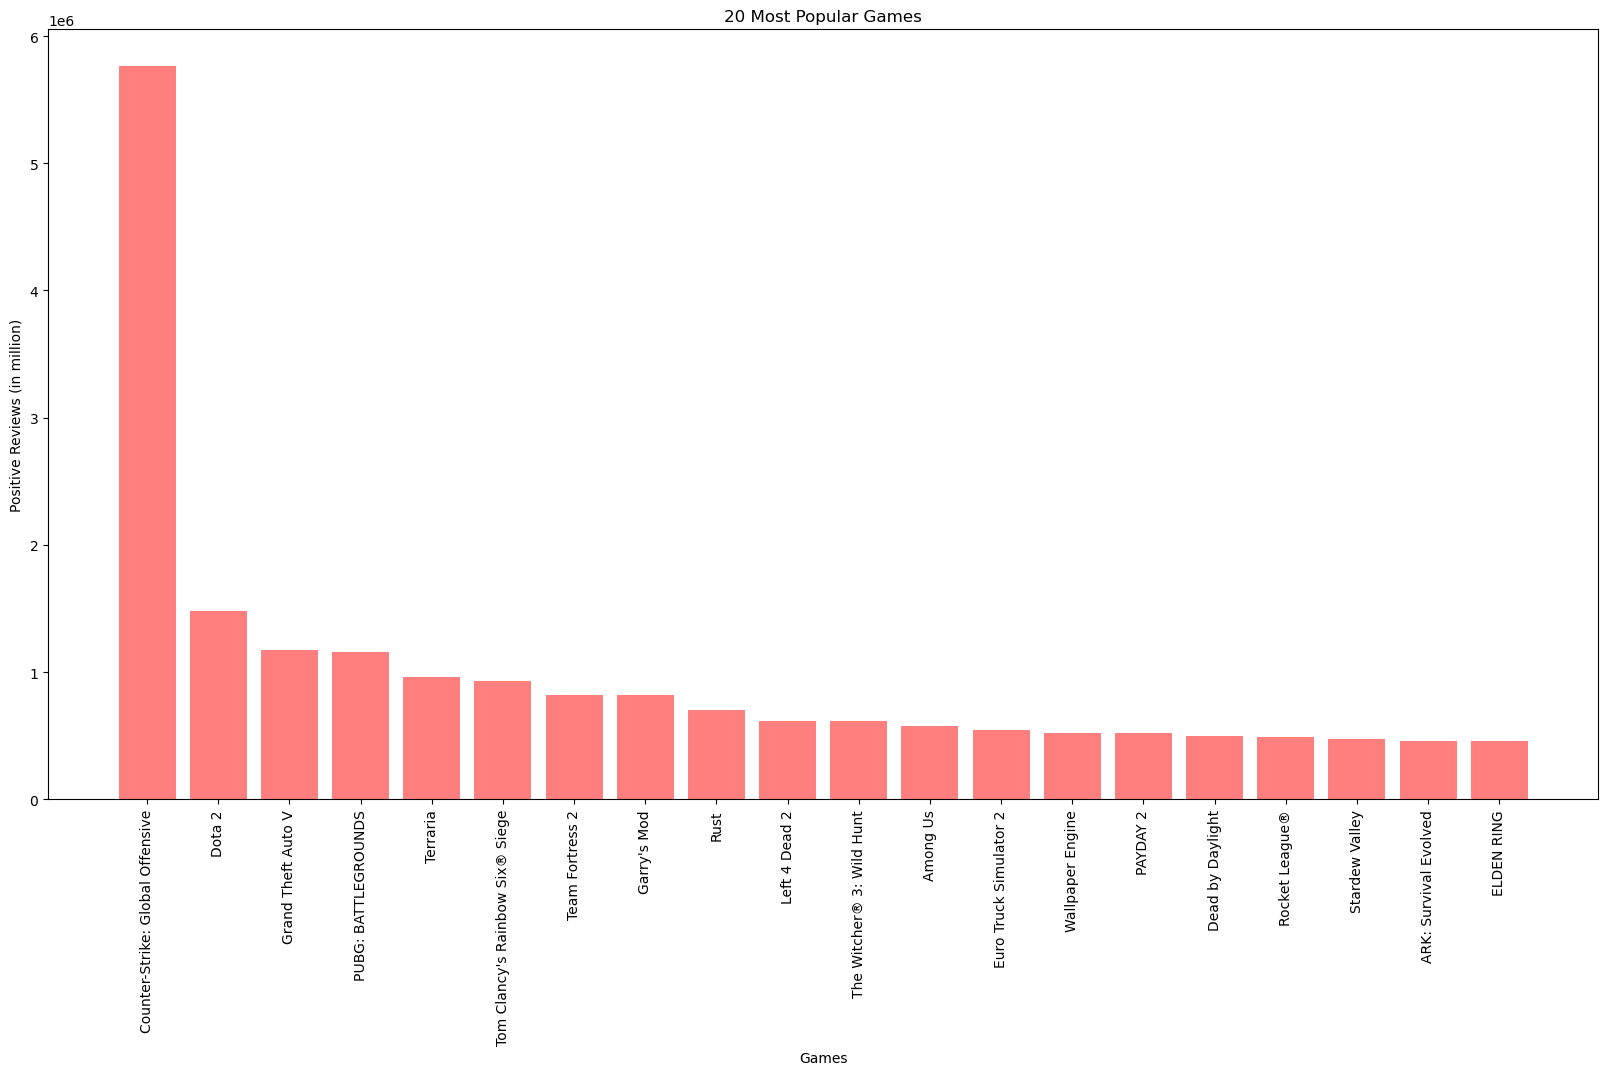

In [31]:
plt.figure(figsize=(20,10))
plt.bar(games_x_axis, games_reviews_df["Positive"], color='r', alpha=0.5, align="center")
plt.xticks(games_tick_locations, games_reviews_df["Name"], rotation="vertical")
plt.title("20 Most Popular Games")
plt.xlabel("Games")
plt.ylabel("Positive Reviews (in million)")
plt.show()

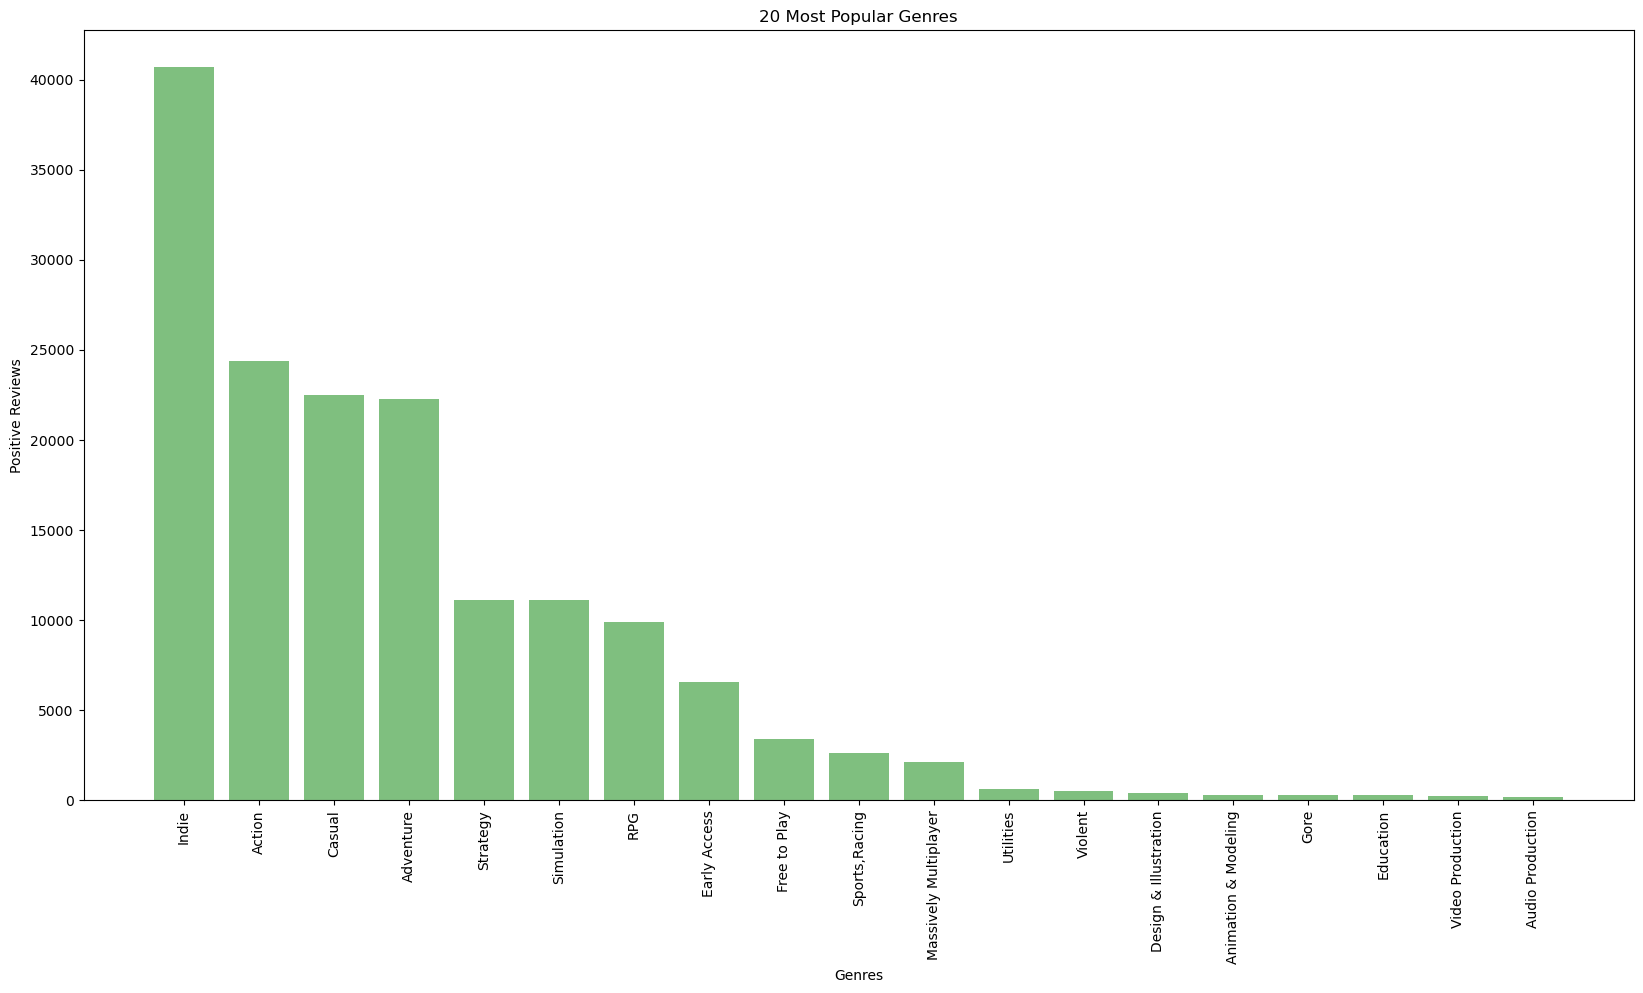

In [68]:
genres = [40709, 24358, 22481, 22263, 11128, 11127, 9909, 6558, 3374, 2633, 2138, 611,483,390,299,290,281,204,156]
genre_x_axis = np.arange(len(genres))
genre_tick_locations = [value for value in genre_x_axis]
plt.figure(figsize=(20,10))
plt.bar(genre_x_axis, genres, color='green', alpha=0.5, align="center")
plt.xticks(genre_tick_locations, ["Indie","Action","Casual","Adventure","Strategy","Simulation","RPG","Early Access",
                                  "Free to Play","Sports,Racing","Massively Multiplayer" ,"Utilities","Violent",
                                  "Design & Illustration","Animation & Modeling","Gore","Education","Video Production",
                                  "Audio Production"], rotation="vertical")
plt.title("20 Most Popular Genres")
plt.xlabel("Genres")
plt.ylabel("Positive Reviews")
plt.show()

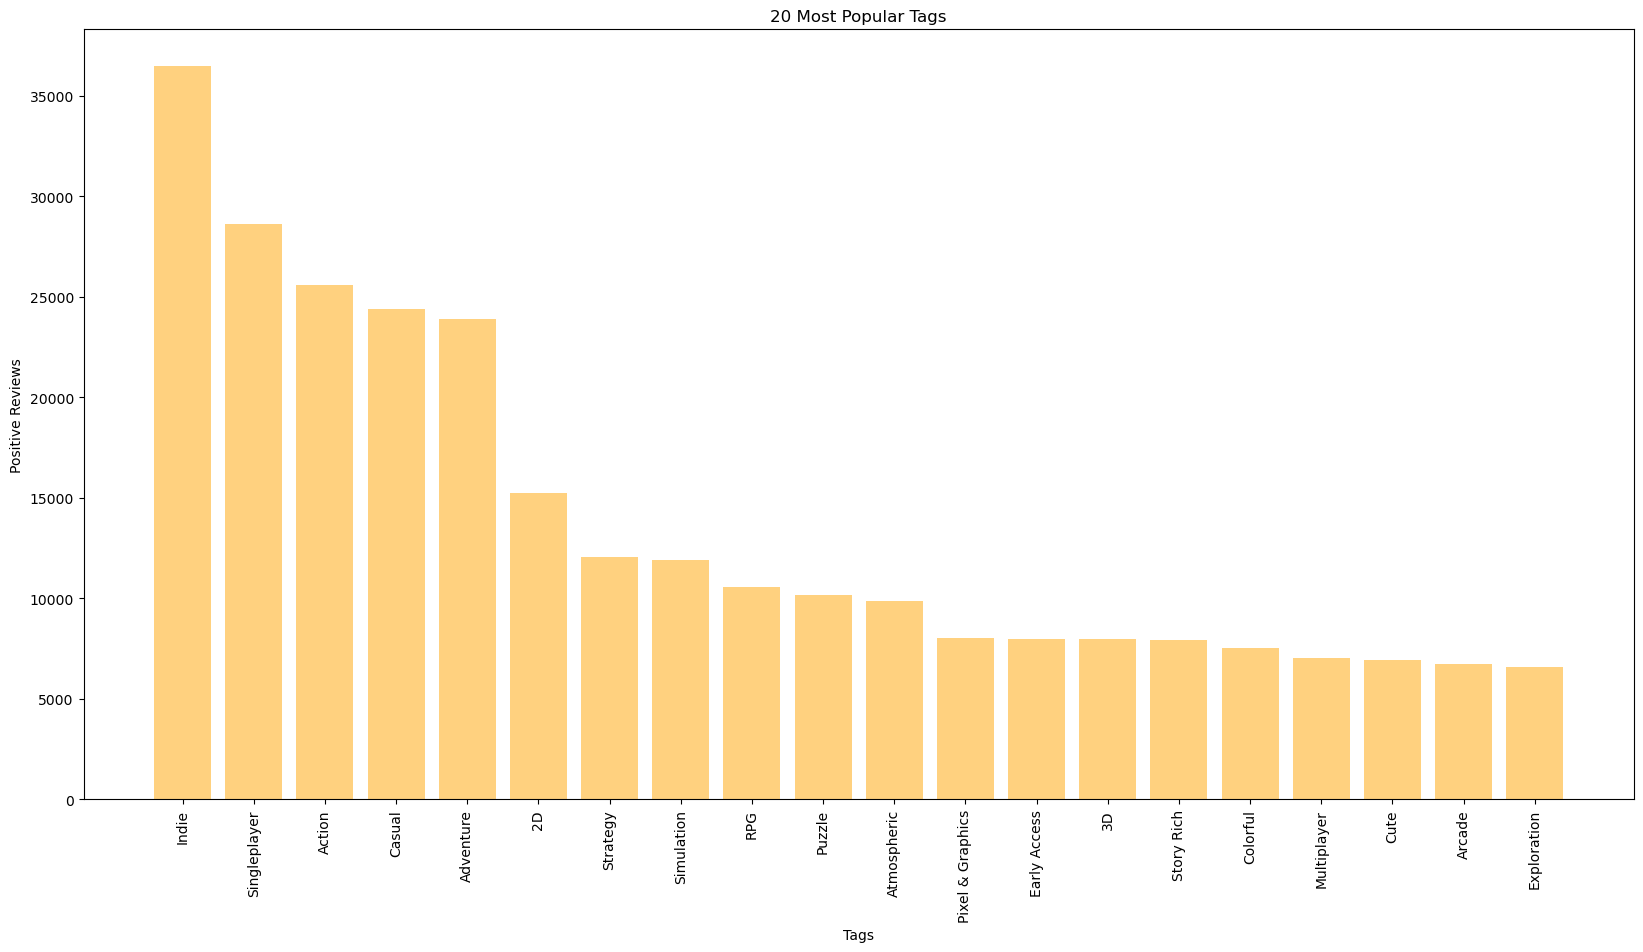

In [72]:
tags = [36484,28653,25579,24418,23924,15270,12079,11895,10585,10191,9891,8026,7993,7968,7945,7515,7060,6930,6752,6588]
tags_x_axis = np.arange(len(tags))
tags_tick_locations = [value for value in tags_x_axis]
plt.figure(figsize=(20,10))
plt.bar(tags_x_axis, tags, color='orange', alpha=0.5, align="center")
plt.xticks(tags_tick_locations, ["Indie","Singleplayer","Action","Casual","Adventure","2D","Strategy","Simulation",
                                 "RPG","Puzzle","Atmospheric","Pixel & Graphics","Early Access","3D","Story Rich",
                                 "Colorful","Multiplayer","Cute", "Arcade","Exploration"], rotation="vertical")
plt.title("20 Most Popular Tags")
plt.xlabel("Tags")
plt.ylabel("Positive Reviews")
plt.show()

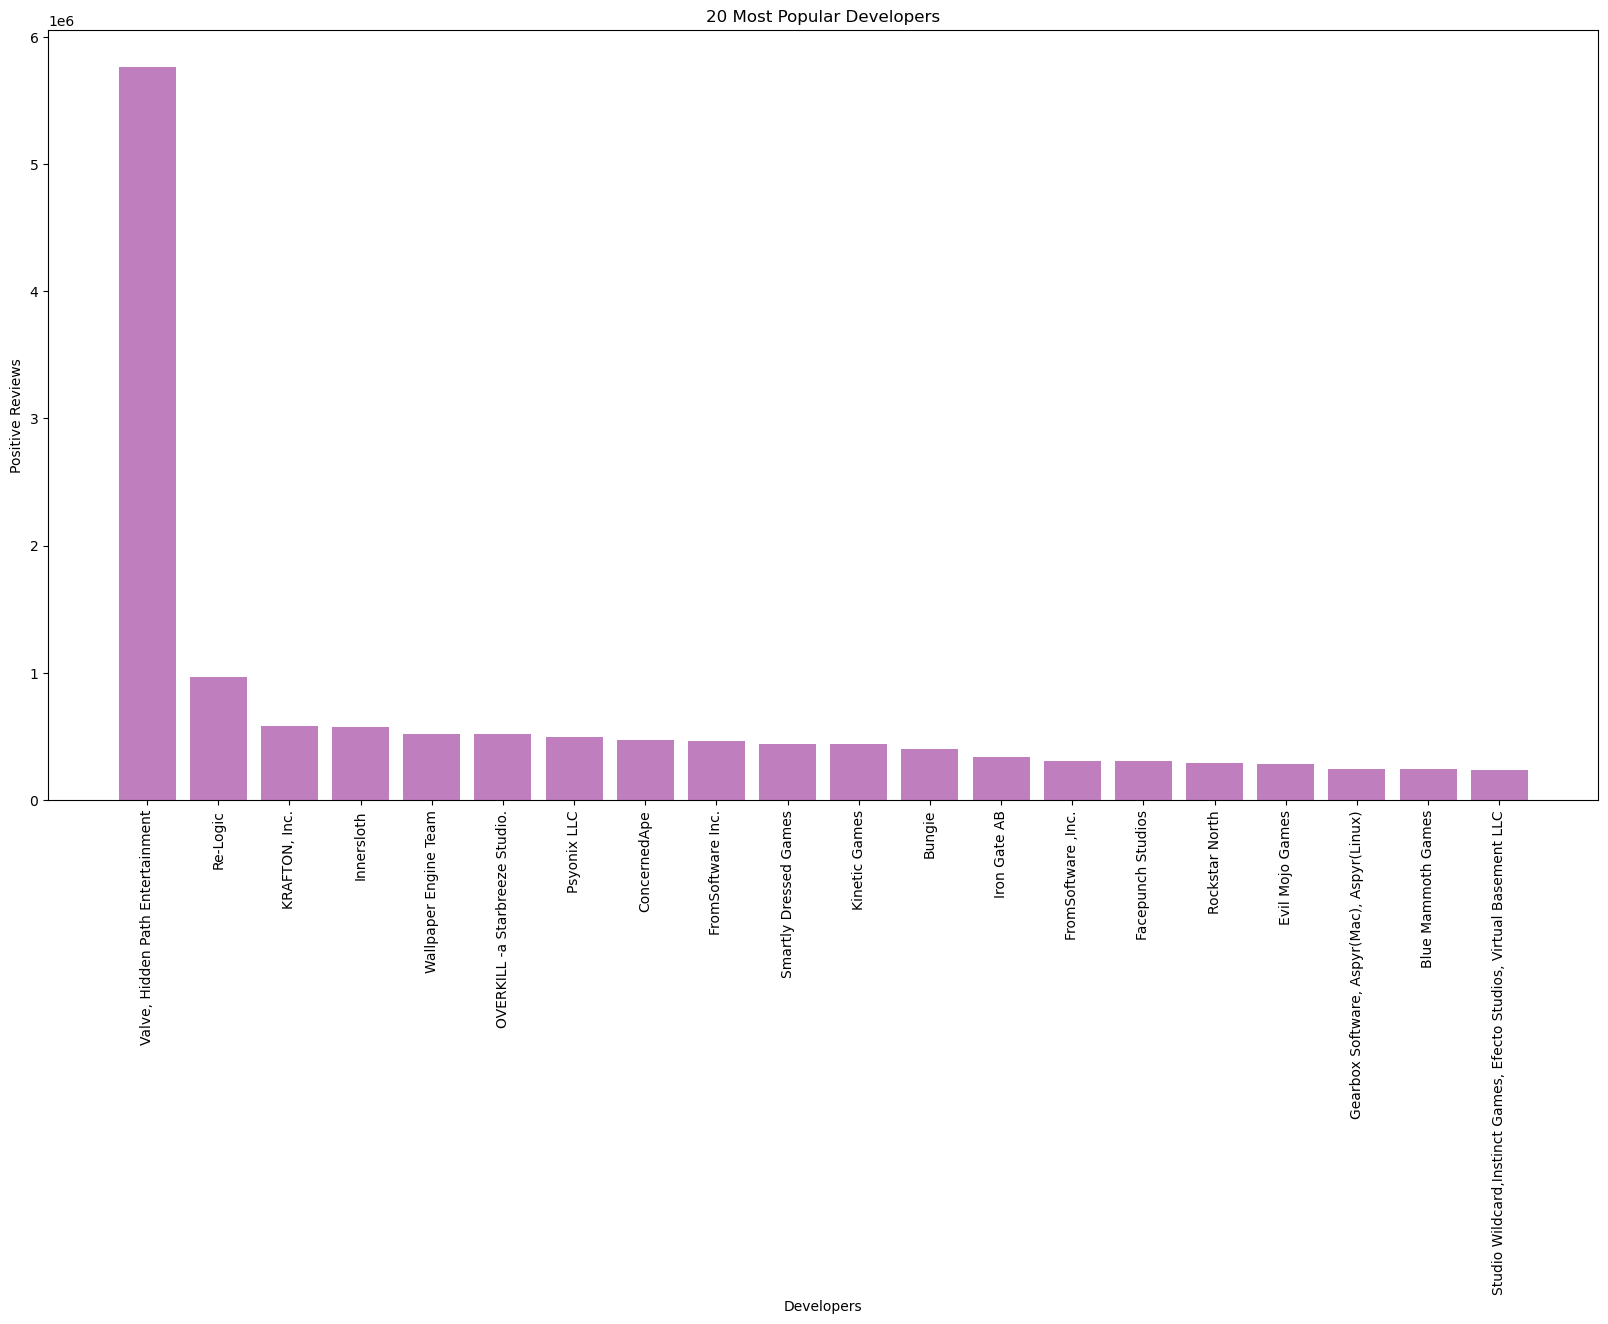

In [83]:
developers = [5764420.0,964983.0,578608.0,577656.0,522889.0,520826.0,493188.0,475785.0,460812.0,443320.0,441220.0,
              403109.0,337177.0,310407.0,305445.0,293461.5,280999.0,247833.0,246362.0,233839.5]
developers_x_axis = np.arange(len(developers))
developers_tick_locations = [value for value in developers_x_axis]
plt.figure(figsize=(20,10))
plt.bar(developers_x_axis, developers, color='purple', alpha=0.5, align="center")
plt.xticks(developers_tick_locations, ["Valve, Hidden Path Entertainment","Re-Logic","KRAFTON, Inc.","Innersloth",
                                 "Wallpaper Engine Team","OVERKILL -a Starbreeze Studio.","Psyonix LLC",
                                 "ConcernedApe","FromSoftware Inc.","Smartly Dressed Games","Kinetic Games",
                                 "Bungie","Iron Gate AB","FromSoftware ,Inc.","Facepunch Studios","Rockstar North",
                                 "Evil Mojo Games","Gearbox Software, Aspyr(Mac), Aspyr(Linux)","Blue Mammoth Games",
                                 "Studio Wildcard,Instinct Games, Efecto Studios, Virtual Basement LLC"], rotation = "vertical")
plt.title("20 Most Popular Developers")
plt.xlabel("Developers")
plt.ylabel("Positive Reviews")
plt.show()

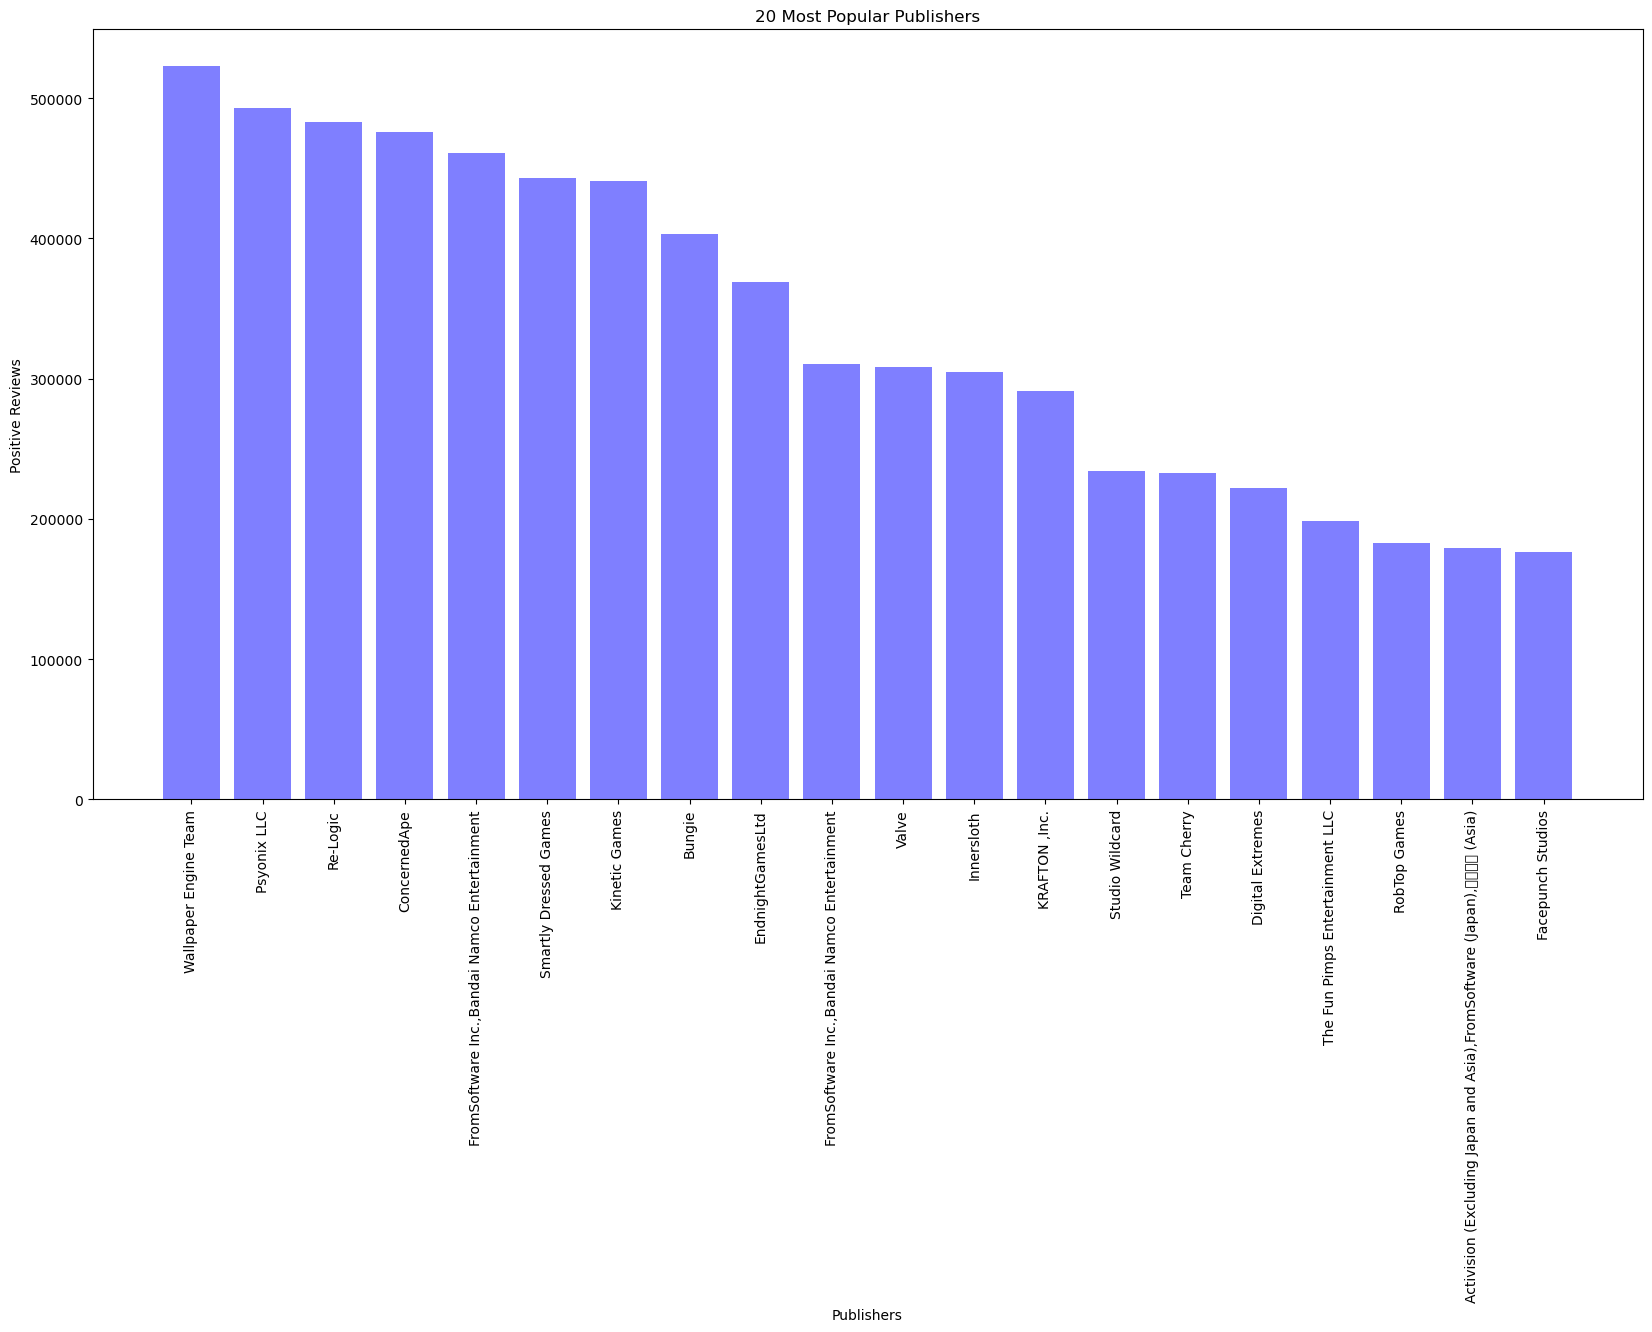

In [86]:
publishers = [522889.000000,493188.000000,482802.000000,475785.000000,460812.000000,443320.000000,
              441220.000000,403109.000000,368986.000000,310407.000000,308132.416667,304372.000000,
              290881.250000,233839.500000,232778.000000,221747.500000,198204.000000,182534.000000,
              179498.000000,176224.750000]
publishers_x_axis = np.arange(len(publishers))
publishers_tick_locations = [value for value in publishers_x_axis]
plt.figure(figsize=(20,10))
plt.bar(publishers_x_axis, publishers, color='blue', alpha=0.5, align="center")
plt.xticks(publishers_tick_locations, ["Wallpaper Engine Team","Psyonix LLC","Re-Logic","ConcernedApe",
                                       "FromSoftware Inc.,Bandai Namco Entertainment","Smartly Dressed Games",
                                       "Kinetic Games","Bungie","EndnightGamesLtd",
                                       "FromSoftware Inc.,Bandai Namco Entertainment","Valve","Innersloth","KRAFTON ,Inc.",
                                       "Studio Wildcard","Team Cherry","Digital Extremes",
                                       "The Fun Pimps Entertainment LLC","RobTop Games",
                                       "Activision (Excluding Japan and Asia),FromSoftware (Japan),方块游戏 (Asia)",
                                       "Facepunch Studios"], rotation = "vertical")
plt.title("20 Most Popular Publishers")
plt.xlabel("Publishers")
plt.ylabel("Positive Reviews")
plt.show()